# Session 7

## [Matplotlib](https://matplotlib.org)

- [Matplotlib](#matplotlib)
  - [the gapminder dataset](#the-gapminder-dataset)
  - [Scatter plots](#scatter-plots)
    - [Log scales](#log-scales)
    - [Extra aesthetics](#extra-aesthetics)
      - [Colour](#colour)
      - [Size](#size)
    - [Faceting](#faceting)
  - [Line plots](#line-plots)
  - [Bar plots](#bar-plots)
  - [Histograms](#histograms)
  - [Box plots](#box-plots)
- [Seaborn](#seaborn)

### The [gapminder](https://gapminder.org) dataset

The gapminder foundation, as featured on the official website:

> Gapminder is an independent educational non-profit fighting global misconceptions.

The dataset contains combines data from multiple sources into unique coherent
time-series. Containing information about humans in all spots on Earth.

We are working on a excerpt of this large dataset, focusing on `country`,
`continent`, `year`, life expectancy `lifeExp`, population `pop`, the economic
output of a nation per person `gdpPercap`.


In [1]:
import pandas as pd

gapminder_path = "../data/raw/gapminder.tsv"

gapminder = pd.read_csv(gapminder_path, sep="\t", parse_dates=["year"])
gapminder.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   country    3312 non-null   object        
 1   continent  3011 non-null   object        
 2   year       3312 non-null   datetime64[ns]
 3   lifeExp    3312 non-null   float64       
 4   pop        3312 non-null   int64         
 5   gdpPercap  3312 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 155.4+ KB


In [2]:
# TODO: import matplotlib's pyplot w/ the alias plt
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (16, 9)


### [Scatter plots](#session-7)

In certain situations, it helps to visualise the relation between 2 variables
as data points (another name for observations/rows). Such visualisation is
called **scatter plot**, and it is one of the most common during _EDA_
`Exploratory Data Analysis`.

```py
# to build a scatter plot through matplotlib
x = gapminder.loc[:, "gdpPercap"]
y = gapminder.loc[:, "lifeExp"]

_ = plt.scatter(x, y) # this call returns a PathCollection object
plt.show()
```


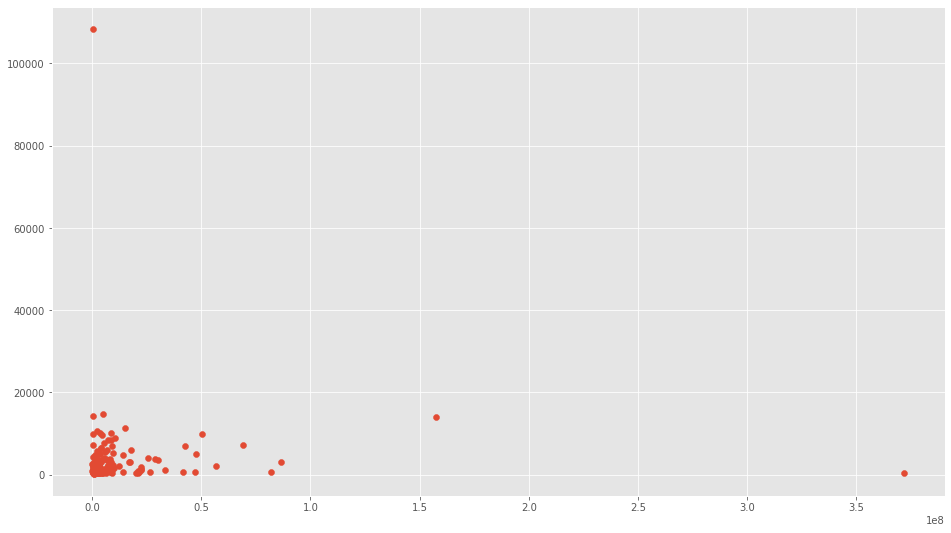

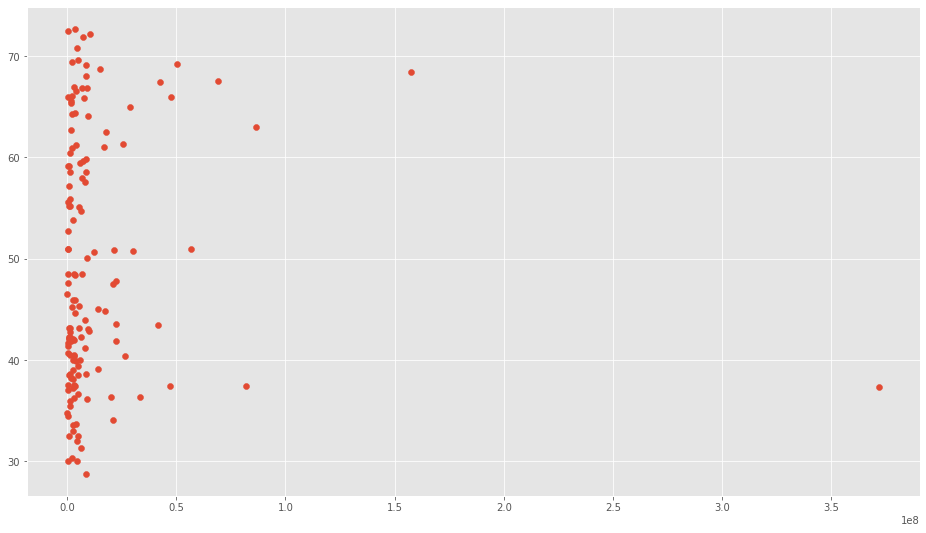

In [3]:
# TODO: create a small dataframe that holds only the data for the year 1952
gap_52 = gapminder.loc[gapminder["year"] == "1952"]

# TODO: create a scatter plot of population on x and gdpPercap on y using the
#   filtered dataframe
plt.scatter(
    "pop",
    "gdpPercap",
    data=gap_52,
)  # like ggplot
plt.show()

# TODO: create another scatter plot of life expectancy versus population
plt.scatter(gap_52.loc[:, "pop"], gap_52.loc[:, "lifeExp"])
plt.show()


#### [Log scales](#session-7)

As you might have noticed, the data is not spread nicely, seems a bit clattered
at one end.

Sometimes, data scales might not be linear, in such cases, a different scale
might provide better insights.

```py
# To alter the scale of an axis in matplotlib
_ = plt.scatter(x, y)
plt.xscale("log")
# default is linear, also available `symlog`, `logit` and objects of `ScaleBase`
plt.yscale("log")
plt.show()
```


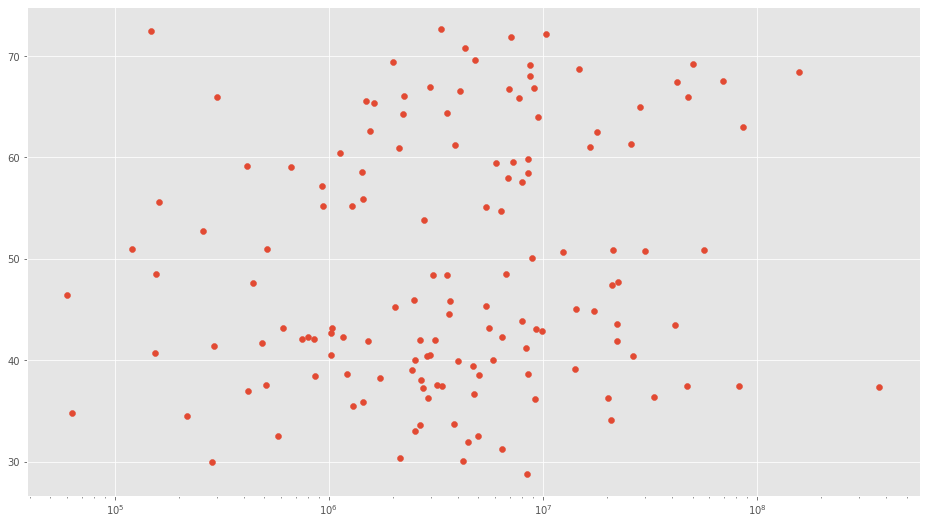

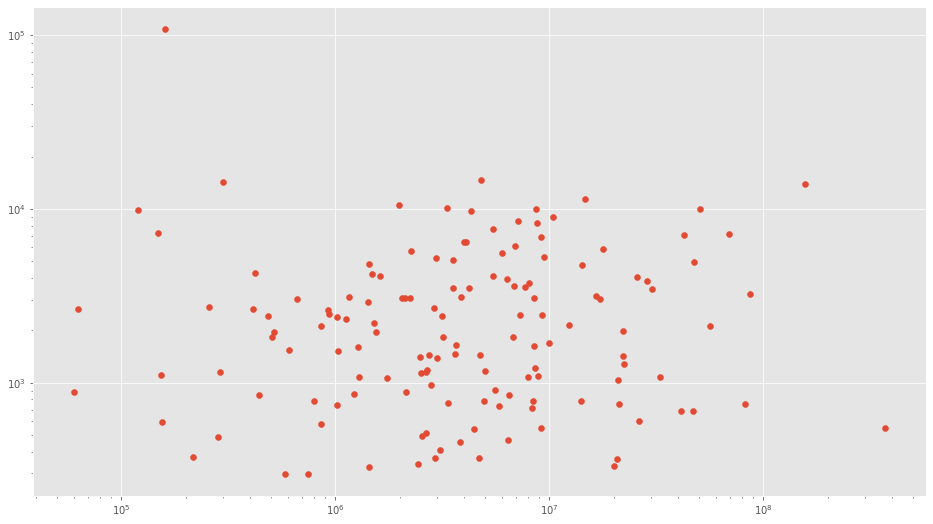

In [4]:
# TODO: using the filtered set, create a scatter of lifeExp vs pop
plt.scatter(gap_52.loc[:, "pop"], gap_52.loc[:, "lifeExp"])

# TODO: before showing the plot, set the scale of x-axis to log
plt.xscale("log")
plt.show()

# TODO: create scatter of gdpPercap vs pop
plt.scatter(
    "pop",
    "gdpPercap",
    data=gap_52,
)  # like ggplot

# TODO: scale both x, & y axes to be log
plt.xscale("log")
plt.yscale("log")

plt.show()


#### [Extra aesthetics](#session-7)

It could be helpful to visualise more than just 2 variables in the same plot,
but that could prove challenging with 2D plots. Two new aesthetics come into
play: _colour_ and _size_

##### [Colour](#session-7)

This works best with category variables, where each colour is a certain value
of a categorical variable

```py
# it takes a bit of work to use colours w/ matplotlib
continents = gapminder.loc[:, "continent"]
colours = {continent:i for i, continent in enumerate(continents.unique())}

_ = plt.scatter(x, y, c=continents.map(colours))
plt.xscale("log")
plt.yscale("log")
plt.show()
```


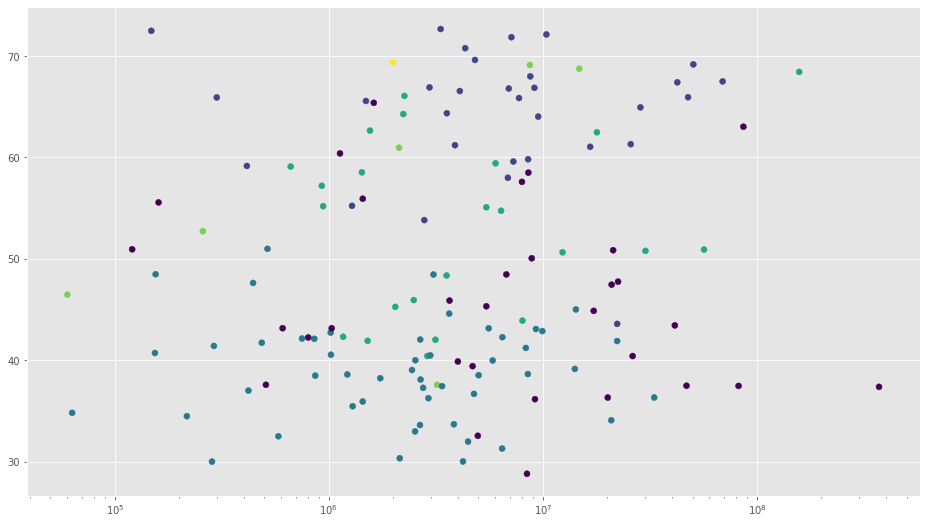

In [5]:
# TODO: extract the continent series from the filtered dataframe
continents = gap_52.loc[:, "continent"]

# TODO: build a dictionary of colours based of unique values in continent series
colours = {continent: i for i, continent in enumerate(continents.unique())}

# TODO: create a scatter plot of lifeExp vs pop, and use the continent as
#   extra aesthetic
plt.scatter(
    "pop",
    "lifeExp",
    data=gap_52,
    c=continents.map(colours),
)

# TODO: don't forget the scaling
plt.xscale("log")
plt.show()


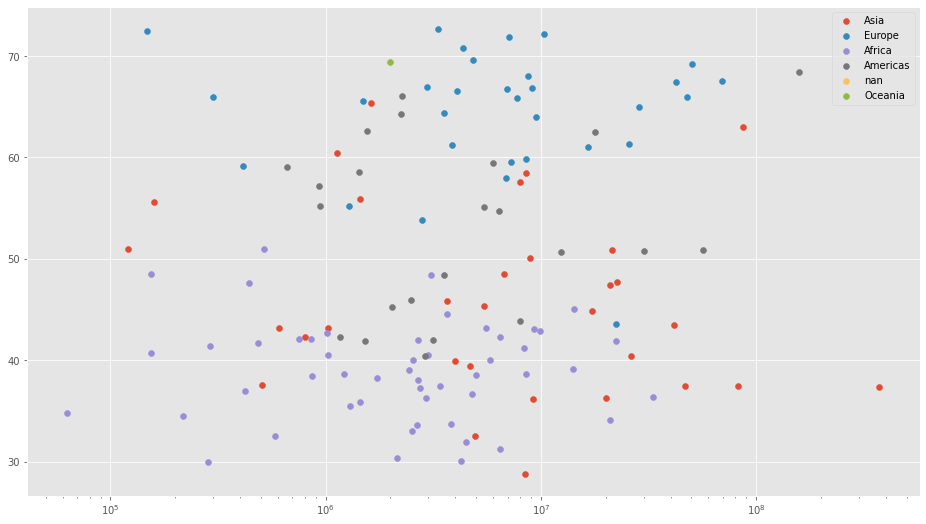

In [6]:
_, ax = plt.subplots()

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i, continent in enumerate(continents.unique()):
    idx = gap_52.loc[:, "continent"] == continent
    ax.scatter("pop", "lifeExp", data=gap_52.loc[idx], c=colors[i], label=continent)

plt.legend()
plt.xscale("log")
plt.show()


##### [Size](#session-7)

This one works best with numerical variables, preferably continuous, where the
size of a data point is determined by a value of another variable.

```py
# simply extract the new column, you may choose to normalise the data [0,1]
gdpPercap = gapminder.loc[:, "gdpPercap"]

_ = plt.scatter(x, y, c=continents.map(colours), s=gdpPercap)
plt.xscale("log")
plt.yscale("log")
plt.show()
```

> N.B: at this point, the graph might not be very appealing, some points could
> completely cover other points, hence we use a different aesthetic `alpha`


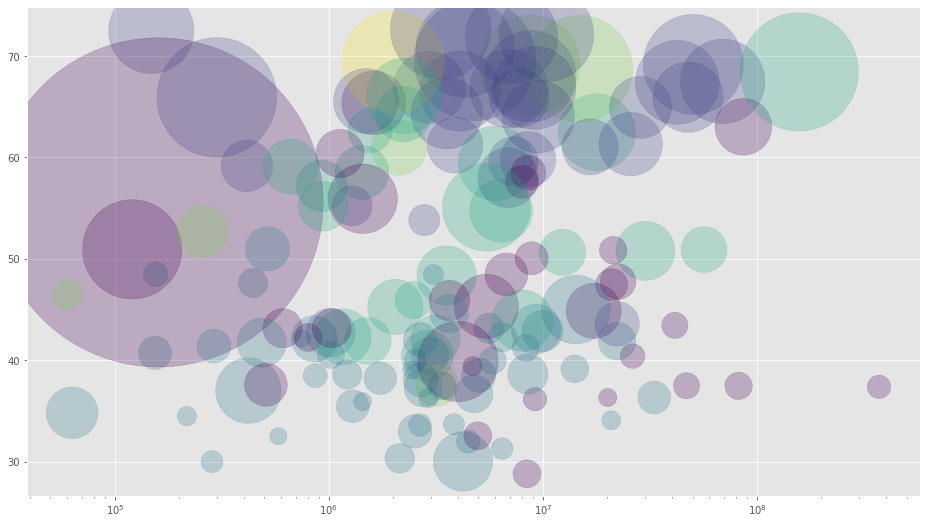

In [7]:
# TODO: extract the gdpPercap series from the filtered dataframe

# TODO: create a scatter plot of lifeExp vs pop, use continent & gdpPercap as
#   extra aesthetics
# EXTRA: avoid having hidden data points w/ a new aesthetic
plt.scatter(
    "pop",
    "lifeExp",
    data=gap_52,
    s="gdpPercap",
    alpha=0.25,
    c=continents.map(colours),
)

# TODO: remember remember the scaling
plt.xscale("log")
plt.show()


### [Faceting](#session-7)

The faceting allows for other way of visualising multiple variables, but this
one gives multiple axes rather than a single one.

> N.B: faceting with matplotlib is difficult, we should focus on how to achieve it by seaborn instead

To facet in matplotlib (again, you may safely ignore that):

```py
# first, we extract the faceting variable
continents_series = gapminder.loc[:, "continent"]
# we need only the unique values, excluding nulls
continents = continents_series.dropna().unique()

# defining the grid (rows, columns number) for faceting
n = len(continents) # no. of all available variables
m = int(np.ceil(n ** 0.5)) # no. of columns
n = int(np.ceil(n / m)) # no. of rows

# creating axes for faceting
_, axes = plt.subplots(n, m, sharex=False, sharey=False)
# NOTE: axes is a numpy array

# filling the facet's axes one by one
for i, continent in enumerate(continents):
    # select the axis to address
    ax = axes[i // m, i % m]
    # define the index corresponding to the current continent
    idx = continents_series == continent
    # define the scatter plot coordinates
    x = gapminder.loc[idx, "gdpPercap"]
    y = gapminder.loc[idx, "lifeExp"]

    # calling the scatter API
    ax.scatter(x, y)
    # setting the title, to be able to read the facet grid
    ax.title.set_text(continent)

# scaling the variables for better view
plt.xscale("log")
plt.yscale("log")
# showing the facet grid
plt.show()
```

simply run the next cell as is


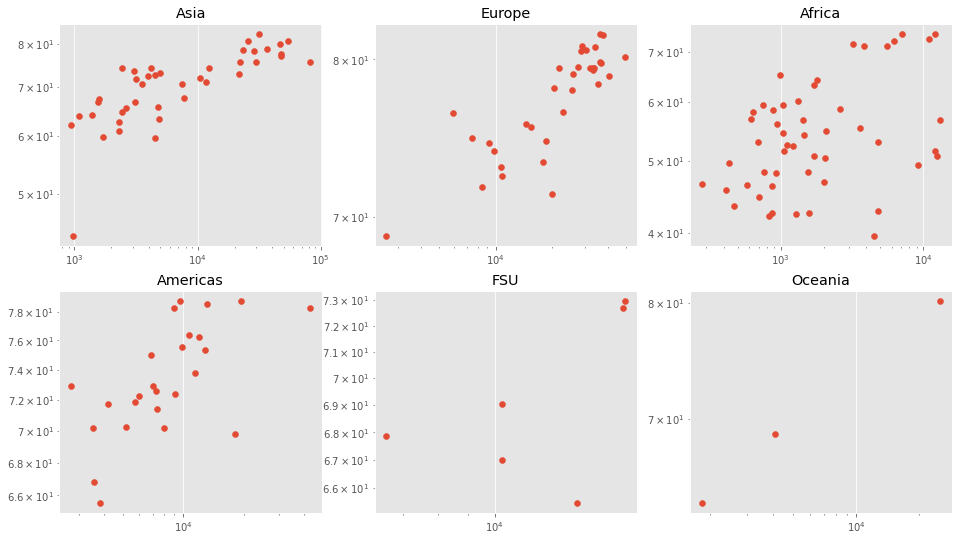

In [8]:
import numpy as np

gap_07 = gapminder.loc[gapminder["year"] == "2007"]
continents_series = gap_07.loc[:, "continent"]
continents = continents_series.dropna().unique()

n = len(continents)
m = int(np.ceil(n ** 0.5))
n = int(np.ceil(n / m))

# creating axes for faceting
_, axes = plt.subplots(n, m, sharex=False, sharey=False)
# NOTE: axes is a numpy array

# filling the facet's axes one by one
for i, continent in enumerate(continents):
    # select the axis to address
    ax = axes[i // m, i % m]
    # define the index corresponding to the current continent
    idx = continents_series == continent
    # define the scatter plot coordinates
    x = gap_07.loc[idx, "gdpPercap"]
    y = gap_07.loc[idx, "lifeExp"]

    # calling the scatter API
    ax.scatter(x, y)
    # scaling the variables for better view
    ax.set_xscale("log")
    ax.set_yscale("log")
    # setting the title, to be able to read the facet grid
    ax.title.set_text(continent)

# showing the facet grid
plt.show()


### [Line plots](#session-7)

Those kind of plots are the most commonly used. You try to visualise how one
variable affects the other. One of the most commonly used is the time-series,
where the x-axis is the time-index, and the y-axis is the only variable.

This kind of plot highlights the regression relation that may be latent in your
dataset.

```py
# to draw line plots
avg_lifeExp = (
    gapminder.loc[:, ["year", "lifeExp", "continent"]]
    .groupby(["year", "continent"])
    .agg({"lifeExp": "mean"})
    .reset_index()
)
x = avg_lifeExp.loc[:, "year"]
y = avg_lifeExp.loc[:, "lifeExp"]
continents = avg_lifeExp.loc[:, "continent"]
colours = {continent: i for i, continent in enumerate(continents.unique())}

# for the moment, let's select a single continent
continent = np.random.choice(list(colours.keys()))
idx = continents == continent

plt.plot(x.loc[idx], y.loc[idx], label=continent) # for legend
plt.xlabel("year")
plt.ylabel("lifeExp")
# forcing the y-axis to start at 0
_, y_top = plt.ylim()
plt.ylim(0, y_top)
plt.legend()
plt.show()
```


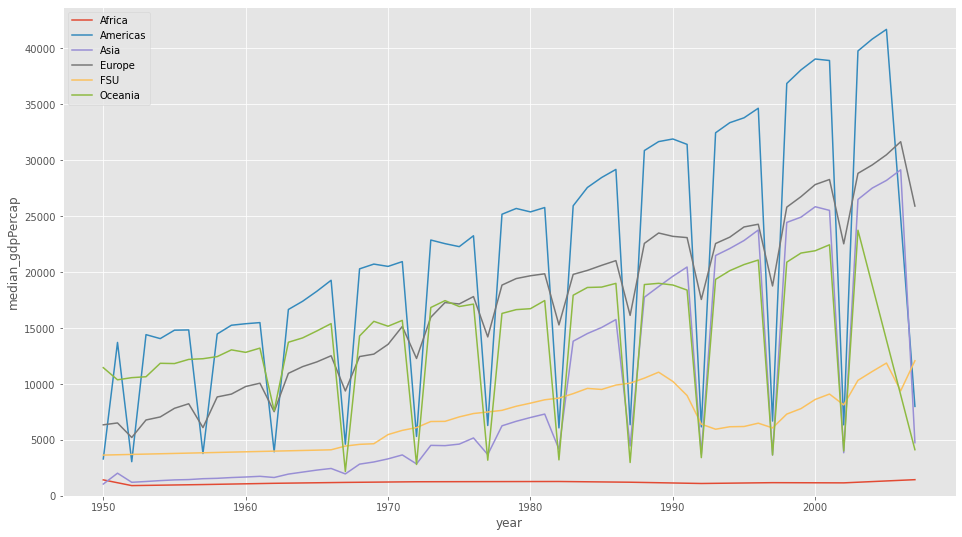

In [9]:
# TODO: find the median gdpPercap against years
# EXTRA: try to include the continent too in the filtering
median_gdpPercap = (
    gapminder.loc[:, ["year", "gdpPercap", "continent"]]
    .groupby(["year", "continent"])
    .agg({"gdpPercap": "median"})
    .reset_index()
)

# TODO: develop your axes parameters x, & y (optionally c for colour)
continents = median_gdpPercap.loc[:, "continent"]
colours = {continent: i for i, continent in enumerate(continents.unique())}

# TODO: select a continent (optional use a for loop for all continents)
for continent in colours:
    # TODO: make a line plot, and make sure to set the label for legend
    idx = continents == continent
    plt.plot("year", "gdpPercap", data=median_gdpPercap.loc[idx], label=continent)

# TODO: set the labels for the axes
plt.xlabel("year")
plt.ylabel("median_gdpPercap")

# TODO: have the y-axis label rest at 0
_, y_top = plt.ylim()
plt.ylim(0, y_top)


# TODO: show the plot, and don't forget the legend call
plt.legend()
plt.show()


### [Bar plots](#session-7)

Bar charts provide a visualisation for the frequency distribution of a
categorical variable.

```py
# to plot a bar chart in matplotlib
mean_lifeExp = gapminder.groupby("continent").agg({"lifeExp": "mean"}).reset_index()
x = mean_lifeExp.loc[:, "continent"]
height = mean_lifeExp.loc[:, "lifeExp"]

plt.bar(x, height)
plt.show()
```

> By default, a bar plot is a vertical bar plot, to have the plot shown as a
> horizontal bar plot, use `plt.barh` instead.


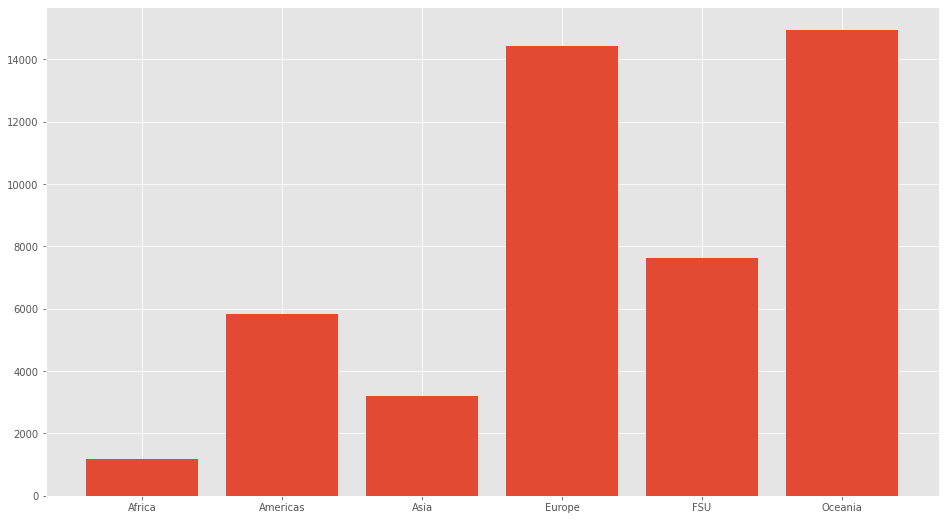

In [10]:
# TODO: find the median gdpPercap against (grouped by) continent
median_gdpPercap = (
    gapminder.loc[:, ["continent", "gdpPercap"]]
    .groupby("continent")
    .median()
    .reset_index()
)

# TODO: extract the categorical variable to x, and the level as height

# TODO: plot the bar chart, then show the plot
plt.bar("continent", "gdpPercap", data=median_gdpPercap)
plt.show()


### [Histograms](#session-7)

That type of plots you might have encountered yourself a lot, and it is, in
layman terms, the quantitative version of the bar plot. It allows us to see the
distribution of a numerical variable.

```py
# to plot histograms in matplotlib
x = gapminder.loc[:, "lifeExp"]

hist, bins, _ = plt.hist(x, bins=32)
plt.show()
```

> N.B: `bins` argument could also be a list or a collection

> N.B: sometimes, using log scale helps identify trend in histograms as well.

```py

bins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))

plt.hist(x, bins=bins)
plt.xscale("log")
plt.show()

```


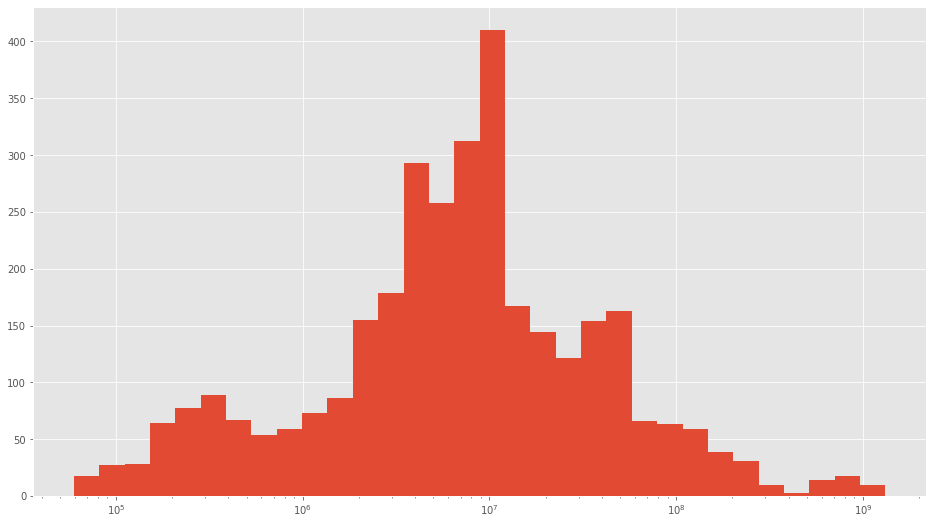

In [11]:
# TODO: extract population as a variable to histogram

# TODO: select the proper number of bins, and plot the histogram
hist, bins, _ = plt.hist("pop", data=gapminder, bins=32)
bins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))
plt.cla()  # clear axis, clf: clear figure

plt.hist("pop", data=gapminder, bins=bins)
plt.xscale("log")
plt.show()


### [Box plots](#session-7)

Most visualisations seen so far deal with a single type of data (discrete,
continuous) or two of them (continuous, continuous). If we need to visualise a
different relation (continuous, discrete), then we need things like `box`,
`violin`, or `swarm` plots

```py
# to plot a box plot in matplotlib
# extract the categorical variable's unique levels
continents = gapminder.loc[:, "continent"].unique()

# collect the numerical variable as non-overlapping sets
boxes = []
for continent in continents:
    idx = gapminder.loc[:, "continent"] == continent
    boxes.append(gapminder.loc[idx, "lifeExp"])

# draw the box plot
plt.boxplot(boxes)
# set the names on for the each box plot
plt.xticks(np.arange(1, len(continents) + 1), labels=continents)
plt.show()
```


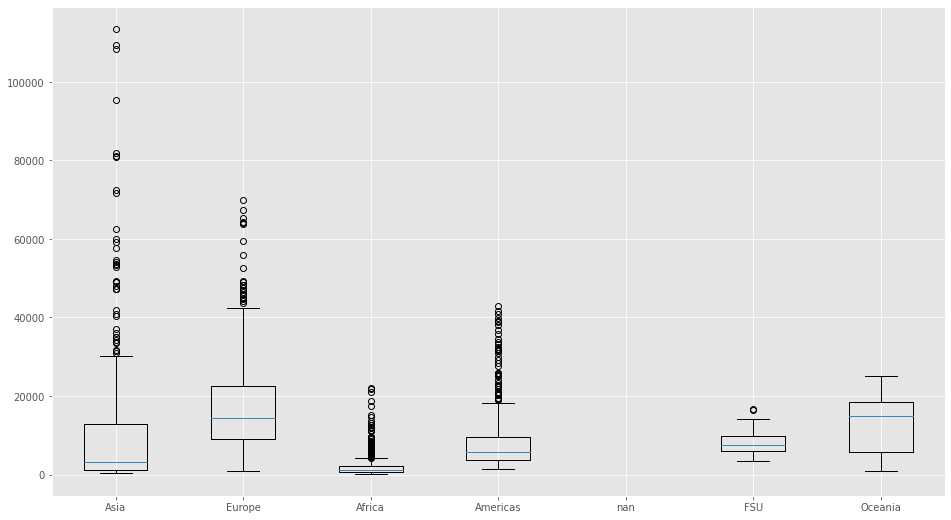

In [12]:
# TODO: prepare the data to visualise a box plot of gdpPercap against continent
continents = gapminder.loc[:, "continent"].unique()
boxes = []
for continent in continents:
    idx = gapminder.loc[:, "continent"] == continent
    boxes.append(gapminder.loc[idx, "gdpPercap"])

# TODO: draw the box plot
plt.boxplot(boxes)

# TODO: set the ticks on x-axis
plt.xticks(np.arange(1, len(continents) + 1), labels=continents)
plt.show()


## [Seaborn](https://seaborn.pydata.org/)

Seaborn is a Python data visualization library based on matplotlib. It provides
a high-level interface for drawing attractive and informative statistical
graphics.

> maybe it is just me, but so far, I have not found a tutorial or a notebook that uses seaborn only! always alongside matplotlib.

Let's repeat the previous plots in seaborn!


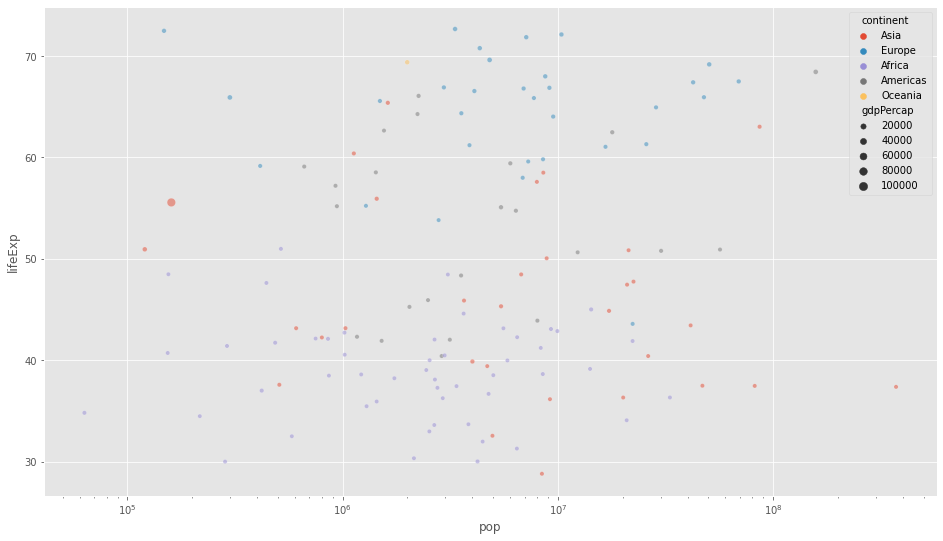

<Figure size 1152x648 with 0 Axes>

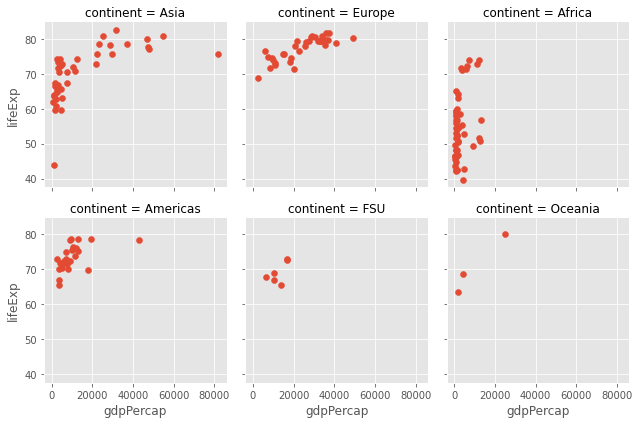

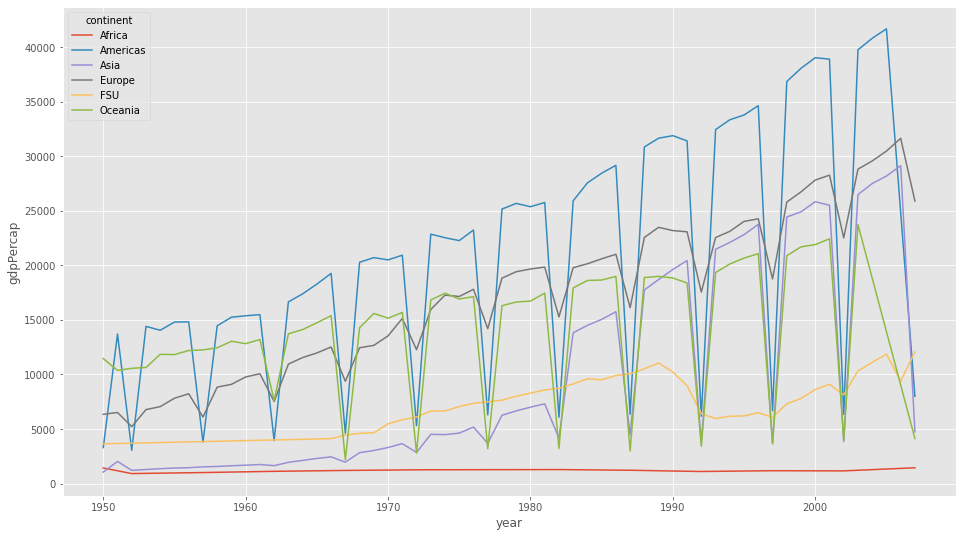

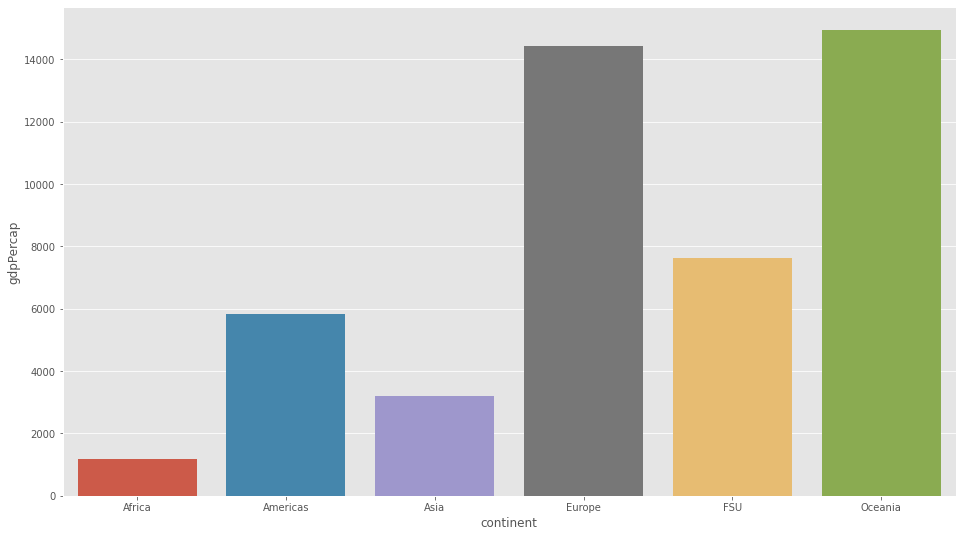

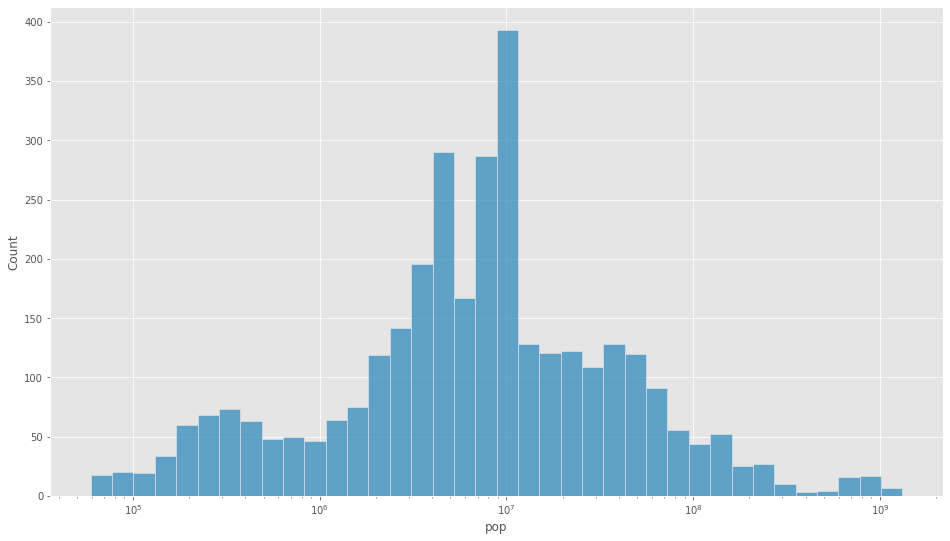

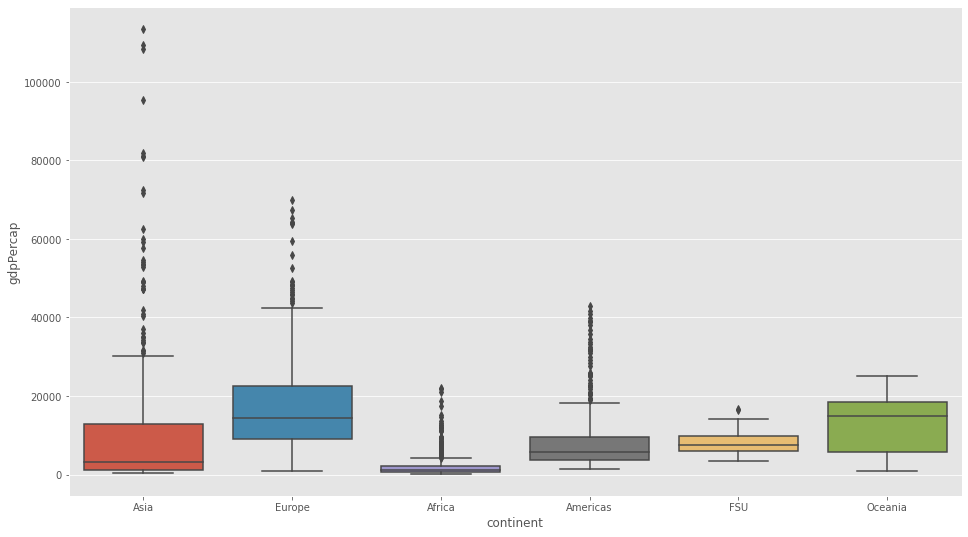

In [37]:
import seaborn as sns

sns.scatterplot(
    data=gap_52, x="pop", y="lifeExp", hue="continent", size="gdpPercap", alpha=0.5
)

plt.xscale("log")
plt.show()

plt.clf()

grid = sns.FacetGrid(gap_07, col="continent", col_wrap=3)
grid.map(plt.scatter, "gdpPercap", "lifeExp")
plt.show()

plt.clf()

median_gdpPercap = (
    gapminder.loc[:, ["year", "gdpPercap", "continent"]]
    .groupby(["year", "continent"])
    .agg({"gdpPercap": "median"})
    .reset_index()
)

sns.lineplot(data=median_gdpPercap, x="year", y="gdpPercap", hue="continent")
plt.show()

plt.clf()

median_gdpPercap = (
    gapminder.loc[:, ["continent", "gdpPercap"]]
    .groupby("continent")
    .median()
    .reset_index()
)

sns.barplot(data=median_gdpPercap, x="continent", y="gdpPercap")
plt.show()

plt.clf()

sns.histplot(data=gapminder, x="pop", log_scale=[True, False])
plt.show()

plt.clf()

sns.boxplot(data=gapminder, x="continent", y="gdpPercap")
plt.show()
